### Websky Sims

The goal of this notebook is to study the iterative estimator when applied to maps with foregrounds.

In [21]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (3,3)


import os

import pathlib

from plancklens.qcinv.util_alm import alm_copy

import scipy
from scipy.interpolate import interp1d, UnivariateSpline


In [17]:
def bin_theory(l, lcl, bin_edges):
    sums = scipy.stats.binned_statistic(l, l, statistic = 'sum', bins = bin_edges)
    cl = scipy.stats.binned_statistic(l, lcl, statistic = 'sum', bins = bin_edges)
    cl = cl[0]/sums[0]
    return cl

def bin(l, cl, lmin = 2, lmax = 5000, nbins = 100):
    lcl = l*cl
    lmax = min(l.max(), lmax)
    bin_edges = np.logspace(np.log10(lmin), np.log10(lmax), nbins + 1)
    cl = bin_theory(l, lcl, bin_edges)
    l = (bin_edges[1:] + bin_edges[:-1])/2
    return l, cl

In [2]:
scratch = os.getenv('SCRATCH')
data = pathlib.Path(scratch) / "n32/S4WebskyWebskyBorn/cmbs/"

datarecs = pathlib.Path(scratch) / "n32/S4WebskyWebskyBorn/lenscarfrecs/"
datarecsextra = pathlib.Path(scratch) / "n32/S4WebskyWebskyBornForegrounds/lenscarfrecs/"

get_name = lambda name, idx: f"sim_{idx:04}_{name}lm.fits"

get_recs = lambda path, idx: path/f"ptt_sim{idx:04}/normalized_phi_plm_it000.npy"

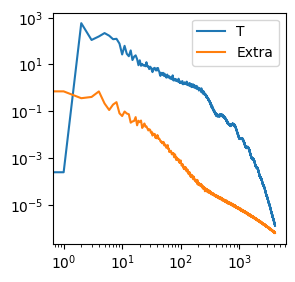

/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_86211/2303802291.py:22: RuntimeWarning: invalid value encountered in divide
  plt.loglog(crossrec/inin, label="Cross")
/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_86211/2303802291.py:23: RuntimeWarning: invalid value encountered in divide
  plt.loglog(crossrecextra/inin, label="Cross Extra")


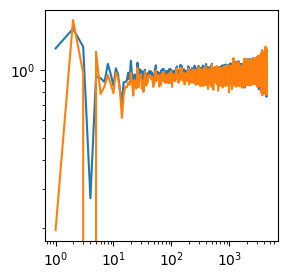

In [5]:
lmax_qlm = 4500

Nsims = 1

for idx in range(Nsims):
    tlm = hp.read_alm(data / get_name("t", idx))
    plm = hp.read_alm(data / get_name("p", idx))
    plm = alm_copy(plm, lmax = lmax_qlm)
    extralm = hp.read_alm(data / get_name("extra", idx))

    plt.loglog(hp.alm2cl(tlm), label="T")
    plt.loglog(hp.alm2cl(extralm), label="Extra")
    plt.legend()
    plt.show()

    rec, recextra = np.load(get_recs(datarecs, idx)), np.load(get_recs(datarecsextra, idx))

    crossrec = hp.alm2cl(rec, plm)
    crossrecextra = hp.alm2cl(recextra, plm)
    inin = hp.alm2cl(plm, plm)

    plt.loglog(crossrec/inin, label="Cross")
    plt.loglog(crossrecextra/inin, label="Cross Extra")
    plt.legend()
    plt.show()

In [8]:
cls = hp.alm2cl(extralm)
ls = np.arange(0, len(cls))
interpolated = interp1d(ls, cls, kind='cubic')

/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_86211/439989249.py:4: RuntimeWarning: invalid value encountered in divide
  cl = cl[0]/sums[0]


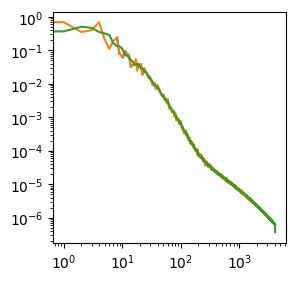

In [54]:
l, clbin = bin(ls, cls, lmax = 5000, nbins = 100)


def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

yhat = smooth(cls, 5)

plt.loglog(l, clbin, label="Extra")
plt.plot(ls, cls, label="Extra")
plt.plot(ls, yhat)
#plt.plot(ls, interpolated(ls))

In [25]:
cls

array([3.97084870e-01, 6.97471256e-01, 3.55445582e-01, ...,
       6.01335377e-07, 6.27733390e-07, 6.24291425e-07])

In [19]:
len(rec)/len(plm)

0.7725385384739671

In [17]:
hp.alm2cl(rec, plm)

ValueError: all alms must have same size